# <center>chap2. End-to-end Machine Learning Project</center>

In [1]:
import os
import sys
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)
# warnings.filterwarnings(action='ignore', message="^internal gelsd")

In [2]:
print('matplotlib version:', mpl.__version__)
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sklearn.__version__)

matplotlib version: 3.1.2
numpy version: 1.18.1
pandas version: 0.25.3
scikit-learn version: 0.22.1


**Main steps went through in a ml project:**
1. Look at the big picture
2. Get the data
3. Discover and visualize the data to gain insights
4. Prepare the data fro ML algorithms
5. Select a model and train it
6. Fine-tune the model
7. Present the solution
8. Launch, monitor, and maintain the system

# 1. Look at the big picture

**<font color='crimson'>It is best to experiment with real-world data, not artificial datasets when learning about ML</font>**.


Here, [California Housing Prices dataset](https://github.com/ageron/handson-ml2/tree/master/datasets/housing) is used, with a categorical attribute added and a few features removed.


The model should learn from this data and be able to predict the median housing price in any distinct, given all the other features.


**The first thing I should do is pull out the ML project checklist.**

## 1.1 Frame the problem

+ The first question to ask your boss is what exactly the business objective is. 想怎么用？用来干什么？作为最终的模型还是说用作中间模型输入到其他模型中？


+ The next question to ask your boss is what the current solution looks like (if any).


With all this information, you are now ready to start designing your system.

## 1.2 Select a performance measure

**<font color='red'>The Root Mean Square Error (RMSE)</font>** gives an idea of how much error the model typically makes in its predictions, with a higher weight for large errors.

<br>

$$RMSE(X, h)=\sqrt{\frac{1}{m}\sum^m_{i=1}(h(x^i)-y^i)^2}$$

<br>

Even though RMSE is generally the preferred performance measure for regression tasks, but in some contexts you may prefer to use another function. For example, **suppose that there are many outlier districts**. In that case, you **may consider using <font color='red'>the mean absolute error, MAE</font>** (also called the average absolute deviation).

<br>

$$MAE(X, h) = \frac{1}{m}\sum^m_{i=1}|h(x^i)-y^i|$$

<br>

+ RMSE corresponds to the *Euclidean norm* (also called the **$l_2$ norm**, $||xx||_2$, or $||xx||$)


+ MAE corresponds to the **$l_1$ norm**, sometimes called the **Manhattan norm** because it measures the distance between two points in a city if you can only travel along orthogonal city blocks.


+ the **$l_k$ norm**: $||v||_k=(|v_0|^k+|v_1|^k+\cdots+|v_n|^k)^{1/k}$.


+ **$l_0$ norm** gives the number of nonzero elements in the vector.


+ **$l_\infty$ norm** gives the maximum absolute value in the vector.


+ **<font color='crimson'>The higher the norm index, the more it focuses on large values and neglects small ones. This is why the RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.</font>**

Huber loss combines the RMSE and MAE:


$$
L(y, f)=\begin{cases}
\frac{1}{2}(y-f)^2, |y-f|\leq \delta \\\\
\delta|y-f|-\frac{1}{2}\delta^2, |y-f|>\delta
\end{cases}
$$
> $\delta$ is usually set to 1.

## 1.3 Check the assumptions

Lastly, it is good practice to list and verify the assumptions that have been made so far.

# 2. Get the data

## 2.1 Create the workspace

Creating an isolated environment is strongly recommended so that you can work on different projects without having conflicting library versions.

## 2.2 Download and load the data

In [3]:
# u should write a small function to load the data
def load_housing_data(data_path='./datasets/housing.csv'):
    # ...
    return pd.read_csv(data_path)

In [4]:
housing = load_housing_data()
housing.shape

(20640, 10)

## 2.3 Take a quick look at the data structure

In [5]:
# look at the top 5 rows
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# look at the last 5 rows
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
# get a quick description of the data
housing.info()  # if the data is two large, you should set `null_counts=True`.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


+ 20640 instances means that it is fairly small by ML standards.


+ `total_bedrooms` has 207 missing values.


+ `ocean_proximity`'s type is **`object`**, so it **could hold any kind of Python object**. But the data is loaded from CSV file, so it must be a text attribute.

In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# show a summary of the numercial attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


+ Note that the null values are ignored (see the `count`).


+ `std` shows the standard deviation, meaning how dispersed(分散的、散布的) the values are.


+ xx% show the corresponding **<font color='red'>percentiles</font>**: a percentile indicates the value below which a given percentage of observations in a group of observations fall. For example, 25% of the districts have a `housing_median_age` lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the **25th percentile (or first quartile)**, the median, and the **75th percentile (or third quartile)**.

Another quick way to get a feel of the type of data you are dealing with is to **plot a histogram for each numerical attribute**. **A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis)**.

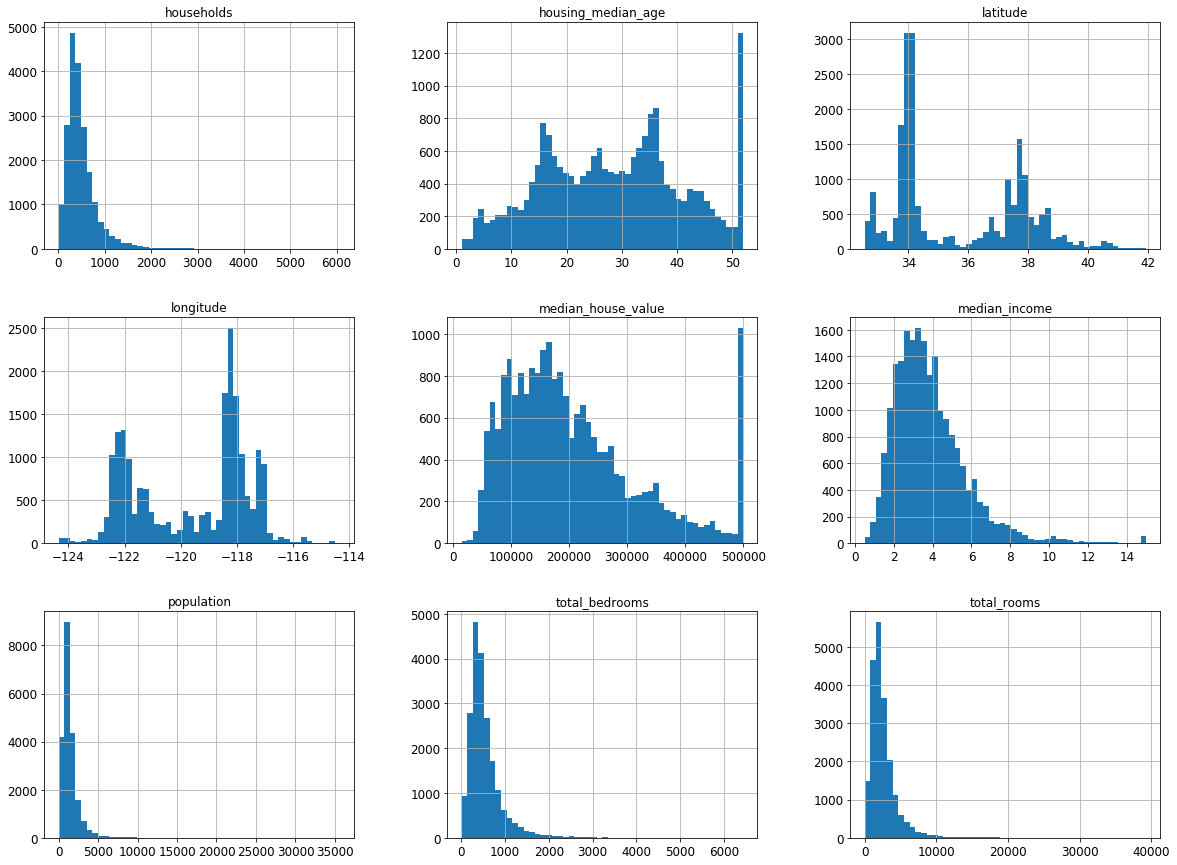

In [10]:
# plot a histogram for each numerical attribute on the whole dataset
housing.hist(bins=50, figsize=(20, 15))
plt.show()

+ The `median_income` has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes.


+ `housing_median_age` and `median_house_value` were also capped. The latter may be a serious problem since it is your target attribute (your labels). ML algorithms may learn that prices never go beyond that limit. You need to check to see if this is a problem or not. If you need precise predictions even beyond $500,000, then you have two options:

    + Collect proper labels for the districts whose labels were capped.

    + Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).


+ Many histograms are **<font color='crimson'>tail-heavy</font>** (**transform them by computing their logarithm**): they extend much farther to the right of the median than to the left. This may make it a bit harder for some ML algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

<br>

+ `%matplotlib inline` tells Jupyter to set up Matplotlib so it uses Jupyter's own backend. Plots are then rendered within the notebook itself.


+ Calling `plt.show()` is optional in a Jupyter notebook, as Jupyter will automatically display plots when a cell is executed.

## 2.4 Get a test set

到现在为止，只是简单地看了下数据，并没有详细地查看、分析数据。为了防止信息泄漏，对测试集过拟合（**<font color='red'>data snooping bias</font>**），现在就应该切分数据。

Both setting `np.random.seed(42)` or saving the test set on the first run will break the next time you fetch an updated dataset. **<font color='crimson'>To have a stable train/test split even after updating the dataset, a common solution is to use each instance’s identifier to decide whether or not it should go in the test set (assuming instances have a unique and immutable identifier)</font>**.

For example, you could **compute a hash of each instance’s identifier** and put that instance in the test set if the hash is lower than or equal to 20% of the maximum hash value. This ensures that the test set will remain consistent across multiple runs, even if you refresh the dataset. The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set.

In [11]:
import hashlib
from zlib import crc32

In [12]:
# work fine in both Python 2 and Python 3
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32


# support any hash function, but much slower and do not support Python 2
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio


# support any hash function and is compatible with both Python 2 and Python 3
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio


def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
# Use the row index as the ID (an identifier column)
housing_with_id = housing.reset_index()
housing_with_id.head(2)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [14]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

**If you use the row index as a unique identifier**, you need to **make sure that new data gets appended to the end of the dataset and that no row ever gets deleted. If this is not possible**, then you **can try to use the most stable features to build a unique identifier**. For example, a district’s `latitude` and `longitude` are guaranteed to be stable for a few million years, so you could combine them into an ID like so:

In [15]:
# Use the `longitude` and `latitude` as the ID
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

In [16]:
test_set.head(2)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15


**Use sklearn's `train_test_split()`**:

+ `random_state` parameter allows you to set the random generator seed.


+ You can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate DataFrame for labels).

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [19]:
test_set.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND


This is generally fine if the dataset is large enough (especially relative to the number of attributes), but if it's not, you run the risk of introducing a significant sampling bias. To avoid this, you should use **<font color='crimson'>stratified sampling</font>**.

Here, if the `median_income` is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. Since the `median_income` is a continuous numerical attribute, you first need to create an income category attribute.

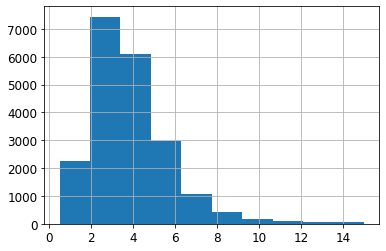

In [20]:
# look at he median income histogram
housing["median_income"].hist()
plt.show()

Most `median_income` values are clustered around 1.5 to 6 (i.e., $15,000–$60,000), but some `median_income` go far beyond 6. **<font color='crimson'>It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum’s importance may be biased. This means that you should not have too many strata, and each stratum should be large enough.</font>**

In [21]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels=[1, 2, 3, 4, 5])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [22]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

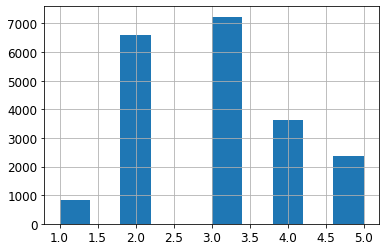

In [23]:
housing['income_cat'].hist()
plt.show()

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

In [25]:
# do stratified sampling based on the income category using `StratifiedShuffleSplit`
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]

In [26]:
housing['income_cat'].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [27]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [28]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3


In [29]:
# do stratified sampling based on the income category using `train_test_split`
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing['income_cat'], random_state=42)

In [30]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [31]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3


> 两种方法一摸一样。

In [32]:
def compare_different_sampling():
    """
    Compares the income category proportions in the overall dataset, in the
    test set generated with stratified sampling, and in a test set generated
    using purely random sampling.
    """
    def income_cat_proportions(data):
        return data["income_cat"].value_counts() / len(data)

    # random sampling
    train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

    compare_props = pd.DataFrame({
        "Overall": income_cat_proportions(housing),
        "Stratified": income_cat_proportions(strat_test_set),
        "Random": income_cat_proportions(test_set),
    }).sort_index()
    compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
    compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

    return compare_props

In [33]:
compare_different_sampling()

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [34]:
# Remove the `income_cat` attribute so the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop(columns='income_cat', inplace=True)

/Users/bingli/anaconda3/envs/tf/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
strat_test_set.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN


# 3. Discover and visualize the data to gain insights

Now, go into a little more depth (understanding data).

+ Firstly, make sure the test set is put aside and you are only exploring the training set.


+ Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast.


+ Lastly, create a copy so that you can play with it without harming the training set.

In [36]:
# Create a copy so that u can play with it without harming the raw data
housing = strat_train_set.copy()

## 3.1 Visualizing geographical data

It is a good idea to create a scatterplot when there has geographical info (latitude and longitude).

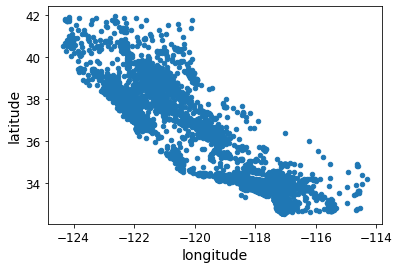

In [37]:
housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

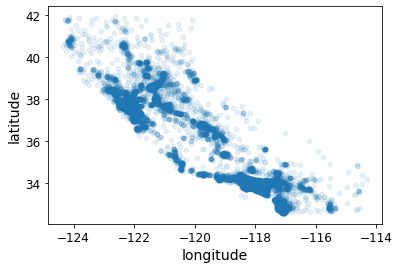

In [38]:
# Setting `alpha` to 0.1 makes it much easier to visualize the places where
# there is a high density of data points
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()

> Now, you can clearly see the high-density areas.

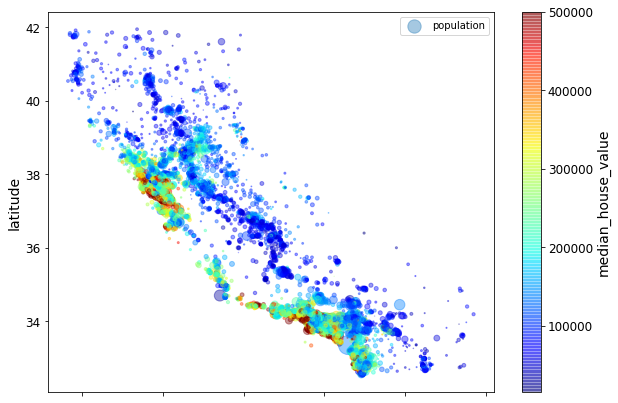

In [39]:
# Play around with visualization parameters to make the patterns stand out
# `s`: the radius of each circle represents the district's population
# `c`:  the color represents the price
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population']/100., label='population', figsize=(10, 7),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.show()

> This shows that the housing prices are very much related to the locating (e.g., close to the ocean) and to the population density. A clustering algorithm should be useful for detecting the main cluster and for adding new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well.

## 3.2 Look for correlations

+ **<font color='green'>Way 1 to calculate correlation</font>**

In [40]:
# Compute the standard correlation coefficient (Pearson's r)
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [41]:
# Look at how much each attribute correlates with the median house value
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

The correlation coefficient ranges from -1 (strong negative correlation) to 1 (strong positive correlation). 0 means that there is no linear correlation.

**<font color='crimson'>The correlation coefficient only measures linear correlations</font>** (“if x goes up, then y generally goes up/down”). **<font color='crimson'>It may completely miss out on nonlinear relationships</font>** (e.g., “if x is close to 0, then y generally goes up”).

![standard-correlation-coefficient](./figs/chap02-figs/standard-correlation-coefficient.png)

+ Plots in the last row have a correlation coefficient equal to 0, despite their axes are clearly not independent: these are examples of nonlinear relationship.


+ The second row shows that examples where the correlation coefficient is equal to -1 or 1. Notice that this has nothing to do with the slope.

+ **<font color='green'>Way 2 to calculate correlation</font>**

pandas `scatter_matrix()` function plots every numerical attribute against every other numerical attribute.

In [42]:
from pandas.plotting import scatter_matrix

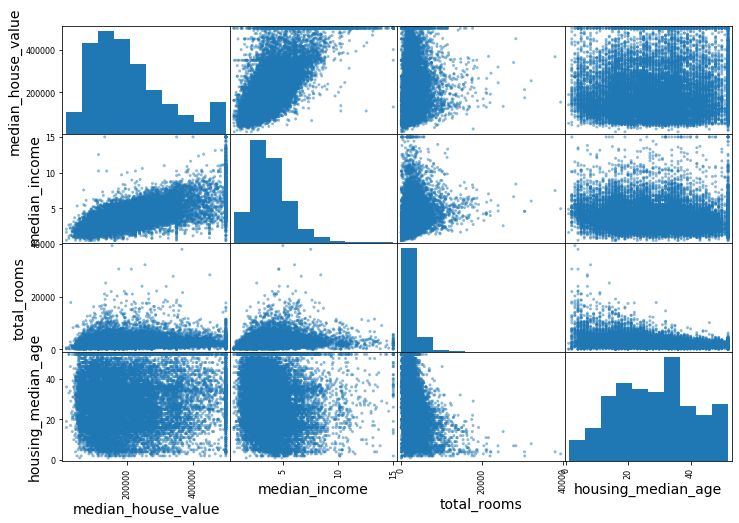

In [43]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

> The main diagonal (top left to bottom right) displays a histogram of each attribute (or other options).

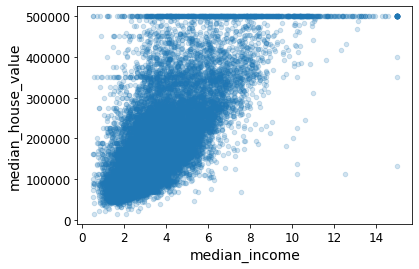

In [44]:
# The most pormising attribute is `median_income`
housing.plot(kind='scatter', x='median_income', y='median_house_value',
             alpha=0.2)
plt.show()

This plot reveals a few things:

+ the correlation is indeed very strong; you can clearly see the upward trend, and the points are not too dispersed.


+ the price cap that we noticed earlier is clearly visible as a horizontal line at 500000. But this plot reveals other less obvious straight lines: a horizontal line around 450000, another around 350000, perhaps one around 280000, and a few more below that. You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

## 3.3 Experimenting with attribute combinations

One last thing before preparing the data from ML algorithms is to try out various attribute combinations.

In [45]:
housing['room_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [46]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
room_per_household          0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Hey, not bad!

**<font color='crimson'>Notice:</font>** This round of exploration does not have to be absolutely thorough; the point is to start off on the right foot (关键是要有一个良好的开端) and quickly gain insights that will help you get a first reasonably good prototype (原型、标准). But this is an iterative process: once you get a prototype up and running, you can analyze its output to gain more insights and come back to this exploration step.

# 4. Prepare the data for ml algorithms

**write functions to prepare the data for ml algorithms:**

+ reproduce these transformations easily on any dataset (e.g., the fresh dataset)


+ gradually build a library of transformation functions that you can reuse in future projects


+ use these functions in the live system to transform the new data before feeding it to the algorithms


+ make it possible for u to easily try various transformations and see which combination of transformations works best.

In [47]:
# `drop` creates a copy of the data and does not affect the raw data
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

## 4.1 Data cleaning

**<font color='crimsion'>process the missing values:</font>**

```python
# option 1: get rid of the row
housing.dropna(subset=['total_bedrooms'])

# option 2: get rid of the whole attribute
housing.drop(columns='total_bedrooms')

# option 3: set the values to some value (zero, the mean, the median, etc)
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)
```

If you choose option 3, you should use it to fill missing values in the training set, test set and the coming new data.

In [48]:
from sklearn.impute import SimpleImputer

In [49]:
# take care of missing values using median
imputer = SimpleImputer(strategy='median')

In [50]:
# the median can only be computed on numerical attributes
# create a copy of the data without the text attribute
housing_num = housing.drop(columns='ocean_proximity')

In [51]:
housing_num.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042


In [52]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

We can not be sure that there won't be any missing values in new data after the system goes live, so it's safe to apply the imputer to all the numerical attributes:

In [53]:
# the computed median stored in its `statistics_` instance variable
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [54]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [55]:
# transform the training set
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X,
                          columns=housing_num.columns,
                          index=housing_num.index)

## 4.2 Handlijg text and categorical attributes

In [56]:
# look the text attributes
housing_cat = housing[['ocean_proximity']] # pd.DataFrame, 一个[]的话就是pd.Series
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [57]:
housing_cat['ocean_proximity'].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

This attribute is a categorical attribute.

In [58]:
from sklearn.preprocessing import OrdinalEncoder

In [59]:
# Use `OrdinalEncoder` to convert the categories from text to numbers
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [60]:
# get the list of categories using the `categories_` instance variable
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

> It is a list containing a 1D array of categories for each categorical attribute (in this case, a list containing a single array since there is just one categorical attribute).

**One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values**. This may be fine in some cases (e.g., for ordered categories such as “bad,” “average,” “good,” and “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1).

To fix this issue, a common solution is to create one binary attribute per category, called **<font color='crimson'>one-hot encoding</font>**. The new attributes are sometimes called **dummy attributes**.

In [61]:
from sklearn.preprocessing import OneHotEncoder

In [62]:
one_hot_encoder = OneHotEncoder()
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

**Notice that the output is a SciPy sparse matrix**, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories.

Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements.

If you want to output a dense NumPy array, you can set `sparse=False` when creating the `OneHotEncoder`.

In [63]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [64]:
housing_cat_1hot.toarray().shape

(16512, 5)

In [65]:
# get the list of categories using the encoder’s categories_ instance variable
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**<font color='crimsion' size=4>A categorical attribute with a larger number of possible categories:</font>**

If **a categorical attribute has a large number of possible categories** (e.g., country code, profession, species), then **one-hot encoding will result in a large number of input features**. This **may slow down training and degrade performance**. If this happens, 

+ you may want to replace the categorical input with useful numerical features related to the categories: for example, you could replace the `ocean_proximity` feature with the distance to the ocean (similarly, a country code could be replaced with the country’s population and GDP per capita).


+ you could replace each category with a learnable, low-dimensional vector called an **embedding**. Each category’s representation would be learned during training. This is an example of **representation learning**.

## 4.3 Custom Transformers

Write your own transformers for tasks such as custom cleanup operations or combining specific attributes.

You will want **<font color='crimson'>your own transformer to work seamlessly with Scikit-Learn functionalities</font>** (such as pipelines), and since **Scikit-Learn relies on duck typing (not inheritance)**, **<font color='crimson'>all you need to do is create a class and implement three methods</font>**: `fit()` (returning self), `transform()`, and `fit_transform()`.

+ You can get the last one for free by simply adding `TransformerMixin` as a base class.


+ If you add `BaseEstimator` as a base class (and avoid `*args` and `**args` in your constructor), you will also get two extra methods (`get_params()` and `set_params()`) that will be useful for automatic hyperparameter tuning.


In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

In [67]:
rooms_idx, bedrooms_idx, population_idx, households_idx = 3, 4, 5, 6

In [68]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    """A small transformer adds the combined attributes."""
    # no *args or **kwargs for getting two extra methods: `get_params()` and `set_params()`
    def __init__(self, add_bedrooms_per_room=True):  # often helpful to provide sensible defaults
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        rooms_per_household = X[:, rooms_idx] / X[:, households_idx]
        population_per_houshold = X[:, population_idx] / X[:, households_idx]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_houshold,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_houshold]

In [69]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attributes = attr_adder.transform(housing.values)

In [70]:
housing.shape, housing_extra_attributes.shape

((16512, 9), (16512, 11))

In [71]:
housing_extra_attributes = pd.DataFrame(
    housing_extra_attributes,
    columns=list(housing.columns)+['rooms_per_household', 'population_per_household'],
    index=housing.index)
housing_extra_attributes.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796


Here, the transformer has one hyperparameter, `add_bedrooms_per_room`, set to `True` by default (**it is often helpful to provide sensible defaults**). This hyperparameter will **allow you to easily find out whether adding this attribute helps the ML algorithms or not**. 


**<font color='blue'>You can add a hyperparameter to gate any data preparation step that you are not 100% sure about. The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time).</font>**

## 4.4 Feature scaling

One of the most important transformations you need to apply to your data is **feature scaling**. **With few exceptions, ML algorithms don’t perform well when the input numerical attributes have very different scales**.

Two common ways to get all attributes to have the same scale:

+ **<font color='red'>Min-max scaling (normalization)</font>**: values are shifted and rescaled so that they end up ranging from 0 to 1 by subtracting the min value and dividing by the max minus the min.

```python
# change the `feature_range` if you do not want 0-1
sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1))
```

```python
# The transformation is given by:
min, max = feature_range
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

# The transformation is calculated as:
X_scaled = scale * X + min - X.min(axis=0) * scale
where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
```


+ **<font color='red'>Standardization</font>**: it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance.

```python
sklearn.preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
```

<br>

+ Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1).


+ **<font color='crimson'>standardization is much less affected by outliers.</font>**

## 4.5 Transformation pipelines

Scikit-Learn provides the `Pipeline` class to help with such sequences of transformations , which can help you make many data transformation steps executed in the right order.

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [73]:
# a small pipeline for the numerical attributes
# List of (name, transform) tuples (implementing fit/transform) that are chained,
# in the order in which they are chained, with the last object an estimator.
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [74]:
housing_num.shape, housing_num_tr.shape

((16512, 8), (16512, 11))

+ **The `Pipeline` constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a `fit_transform()` method).**


+ **The names can be anything you like (as long as they are unique and don’t contain double underscores, `__`); they will come in handy later for hyperparameter tuning.**

<br>

**When you call the pipeline’s `fit()` method, it calls `fit_transform()` sequentially on all transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator, for which it calls the `fit()` method.**

**The pipeline exposes the same methods as the final estimator**. In this example, the last estimator is a `StandardScaler`, which is a transformer, so the pipeline has a `transform()` method that applies all the transforms to the data in sequence (and of course also a `fit_transform()` method, which is the one we used).

In [75]:
# It works great with pandas DataFrames
from sklearn.compose import ColumnTransformer

In [76]:
# Create one transformer to handle all columns, applying the appropriate
# transformations to each column
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

# Requires a list of tuples, where each tuple contains a name,22 a transformer,
# and a list of names (or indices) of columns that the transformer
# should be applied to.
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
], remainder='drop')
# It applies each transformer to the appropriate columns and
# concatenates the outputs along the second axis.
# The transformers must return the same number of rows.
housing_prepared = full_pipeline.fit_transform(housing)

+ `remainder='drop'` (default): only the specified columns in `transformers` are transformed and combined in the output, and the non-specified columns are dropped.


+ `remainder='passthrough'`: all remaining columns that were not specified in `transformers` will be automatically passed through. This subset of columns is concatenated with the output of the transformers.


+ `remainder=estimatror`: the remaining non-specified columns will use the `remainder` estimator. The estimator must support `fit()` and `transform()`. Note that using this feature requires that the DataFrame columns input at fit and transform have identical order.

In [77]:
housing.shape, housing_prepared.shape

((16512, 9), (16512, 16))

In [78]:
housing.values

array([[-121.89, 37.29, 38.0, ..., 339.0, 2.7042, '<1H OCEAN'],
       [-121.93, 37.05, 14.0, ..., 113.0, 6.4214, '<1H OCEAN'],
       [-117.2, 32.77, 31.0, ..., 462.0, 2.8621, 'NEAR OCEAN'],
       ...,
       [-116.4, 34.09, 9.0, ..., 765.0, 3.2723, 'INLAND'],
       [-118.01, 33.82, 31.0, ..., 356.0, 4.0625, '<1H OCEAN'],
       [-122.45, 37.77, 52.0, ..., 639.0, 3.575, 'NEAR BAY']],
      dtype=object)

In [79]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

Note that the `OneHotEncoder` returns a sparse matrix, while the `num_pipeline` returns a dense matrix. **When there is such a mix of sparse and dense matrices, the `ColumnTransformer` estimates the density of the final matrix** (i.e., the ratio of nonzero cells), **and it returns a sparse matrix if the density is lower than a given threshold** (by default, `sparse_threshold=0.3`).

# 5. Select and train a model

## 5.1 Train and evaluate on the training set

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
# train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
# Try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [83]:
print('Predictions:', lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [84]:
print('True labels:', list(some_labels))

True labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [86]:
def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

In [87]:
housing_preds = lin_reg.predict(housing_prepared)
lin_rmse = root_mean_squared_error(housing_labels, housing_preds)
lin_rmse

68628.19819848922

> **Underfitting!** Most districts’ `median_housing_values` range between 120,000 and 265,000, so a typical prediction error of 68,628 is not very satisfying.

In [88]:
lin_mae = mean_absolute_error(housing_labels, housing_preds)
lin_mae

49439.89599001897

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
# DT is a powerful model, capable of finding complex nonlinear relationships in the data.
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [91]:
housing_preds = tree_reg.predict(housing_prepared)
tree_rmse = root_mean_squared_error(housing_labels, housing_preds)
tree_rmse

0.0

> **Badly overfitting!**

## 5.2 Better evaluation using cross-validation

To evaluate the DT model,

+ **way 1**: use the `train_test_split()` to split the training set into a smaller training set and a validation set, then train your models against the smaller training set and evaluate them against the validation set.


+ **a great alternative way**: use Scikit-Learn’s K-fold cross-validation feature.

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
scores = cross_val_score(
    estimator=tree_reg,
    X=housing_prepared,
    y=housing_labels,
    scoring='neg_mean_squared_error',
    cv=10)
tree_rmse_scores = np.sqrt(-scores)

> Scikit-Learn’s **cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better)**, so **the scoring function is actually the opposite of the MSE** (i.e., a negative value), which is why the preceding code computes scores before calculating the square root.

In [94]:
def display_scores(scores):
    print("Scores:\n", scores)
    print("\nMean:", scores.mean())
    print("\nStandard deviation:", scores.std())


display_scores(tree_rmse_scores)

Scores:
 [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]

Mean: 71407.68766037929

Standard deviation: 2439.4345041191004


In [95]:
scores = cross_val_score(
    estimator=lin_reg,
    X=housing_prepared,
    y=housing_labels,
    scoring='neg_mean_squared_error',
    cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [96]:
display_scores(lin_rmse_scores)

Scores:
 [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]

Mean: 69052.46136345083

Standard deviation: 2731.674001798348


the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

**Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation)**.

Cross-validation comes at the cost of training the model several times, so it is not always possible.

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
rf_reg = RandomForestRegressor(random_state=42)

scores = cross_val_score(
    estimator=rf_reg,
    X=housing_prepared,
    y=housing_labels,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1)
rf_rmse_scores = np.sqrt(-scores)

In [99]:
display_scores(rf_rmse_scores)

Scores:
 [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]

Mean: 50182.303100336096

Standard deviation: 2097.0810550985693


This is much better.

**<font color='crimson' size=4>Practice:</font>** 
Before you dive much deeper into RF, however, you should try out many other models from various categories of ML algorithms (e.g., several SVMs with different kernels, and possibly a neural network), without spending too much time tweaking the hyperparameters. The goal is to shortlist a few (two to five) promising models.

In [100]:
from sklearn.svm import SVR

In [101]:
svm_reg = SVR(kernel='linear')
svm_reg.fit(housing_prepared, housing_labels)
housing_preds = svm_reg.predict(housing_prepared)
root_mean_squared_error(housing_labels, housing_preds)

111094.6308539982

**<font color='crimson' size=4>Save sklearn models:</font>** 
You should save every model you experiment with so that you can come back easily to any model you want. You can easily save Scikit-Learn models by using Python’s **`pickle`** module or by using the **`joblib`** library, which is more efficient at serializing large NumPy arrays:

```python
import joblib

joblib.dump(my_model, 'my_model.pkl')

# and later...
my_model_loaded = joblib.load('my_model.pkl')
```

# 6. Fine-tune the model

We now have a shortlist of promising models. We should need to fint-tune them.

## 6.1 Grid search

Tell `GridSearchCV` which hyperparameters you want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values.

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
# type: dict or list of dicts
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try all 2 × 3 = 6 combinations of hyperparameter values
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [104]:
forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=forest_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cv, train each model 5 times
    # Refit an estimator using the best found parameters on the whole dataset.
    refit=True,  # default True
    # If `False`, the `cv_results_` attribute will not include training scores.
    # Computing training scores is used to get insights on how different
    # parameter settings impact the overfitting/underfitting trade-off.
    # computationally expensive and is not strictly required to select the parameters 
    return_train_score=True,  # default False
    n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

> There will be 18×5=90 rounds of training. It may take quite a long time, but when it is done you can get the best combination of parameters.

>  `refit=True` indicates that once the model (grid search) finds the best estimator using cross-validation, it retrains it on the whole training set. This is usually a good idea, since feeding it more data will likely improve its performance.

**<font color='crimson'>When you have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10</font>** (or a smaller number if you want a more fine-grained (详细的、细粒度的) search, as shown in this example with the `n_estimators` hyperparameter).

In [105]:
# Parameter setting that gave the best results on the hold out data
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

> **Since 8 and 30 are the maximum values that were evaluated, you should probably try searching again with higer values.**

In [106]:
# Estimator that was chosen by the search, i.e. estimator which gave highest
# score (or smallest loss if specified) on the left out data.
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [107]:
# Mean cross-validated score of the best_estimator
grid_search.best_score_

-2468328284.7344065

In [108]:
np.sqrt(-grid_search.best_score_)

49682.273345071546

In [109]:
# Scorer function used on the held out data to choose the best parameters for the model.
grid_search.scorer_

make_scorer(mean_squared_error, greater_is_better=False)

In [110]:
# Seconds used for refitting the best model on the whole dataset.
grid_search.refit_time_

1.6324841976165771

In [111]:
cv_results = grid_search.cv_results_
cv_results

{'mean_fit_time': array([0.07630396, 0.26607208, 0.7739593 , 0.12724466, 0.40698524,
        1.23025742, 0.16966233, 0.55709968, 1.71576667, 0.21682477,
        0.72515163, 2.2906816 , 0.12407322, 0.42482862, 0.17521443,
        0.57859535, 0.21840377, 0.64183021]),
 'std_fit_time': array([0.00076896, 0.00224401, 0.00319865, 0.00453311, 0.00454867,
        0.01040734, 0.00521085, 0.00400867, 0.00748595, 0.00222403,
        0.00409784, 0.05117449, 0.00180307, 0.01120892, 0.00413644,
        0.00653729, 0.00342478, 0.01816432]),
 'mean_score_time': array([0.00540204, 0.00958591, 0.02751365, 0.00383716, 0.00936842,
        0.02870412, 0.00344462, 0.00978732, 0.02747216, 0.0042665 ,
        0.00953355, 0.026791  , 0.00390005, 0.01276731, 0.00430679,
        0.01205683, 0.00439534, 0.01107697]),
 'std_score_time': array([2.30382497e-03, 5.00043770e-04, 8.74157012e-04, 5.20968664e-04,
        3.75518329e-04, 1.30032535e-03, 8.95432895e-05, 3.64979054e-04,
        5.79348682e-04, 1.43547743e-

In [112]:
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print('{}: {}'.format(params, np.sqrt(-mean_score)))

{'max_features': 2, 'n_estimators': 3}: 63669.11631261028
{'max_features': 2, 'n_estimators': 10}: 55627.099719926795
{'max_features': 2, 'n_estimators': 30}: 53384.57275149205
{'max_features': 4, 'n_estimators': 3}: 60965.950449450494
{'max_features': 4, 'n_estimators': 10}: 52741.04704299915
{'max_features': 4, 'n_estimators': 30}: 50377.40461678399
{'max_features': 6, 'n_estimators': 3}: 58663.93866579625
{'max_features': 6, 'n_estimators': 10}: 52006.19873526564
{'max_features': 6, 'n_estimators': 30}: 50146.51167415009
{'max_features': 8, 'n_estimators': 3}: 57869.25276169646
{'max_features': 8, 'n_estimators': 10}: 51711.127883959234
{'max_features': 8, 'n_estimators': 30}: 49682.273345071546
{'bootstrap': False, 'max_features': 2, 'n_estimators': 3}: 62895.06951262424
{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}: 54658.176157539405
{'bootstrap': False, 'max_features': 3, 'n_estimators': 3}: 59470.40652318466
{'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [113]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.076304,0.000769,0.005402,0.002304,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053756e+09,1.519591e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.266072,0.002244,0.009586,0.000500,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094374e+09,1.327062e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,0.773959,0.003199,0.027514,0.000874,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626875e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.127245,0.004533,0.003837,0.000521,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716847e+09,1.631510e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.406985,0.004549,0.009368,0.000376,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781618e+09,1.268607e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,1.230257,0.010407,0.028704,0.001300,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,...,-2.537883e+09,1.214614e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,0.169662,0.005211,0.003445,0.000090,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,...,-3.441458e+09,1.893056e+08,14,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,0.557100,0.004009,0.009787,0.000365,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,...,-2.704645e+09,1.471569e+08,6,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,1.715767,0.007486,0.027472,0.000579,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,...,-2.514673e+09,1.285080e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,0.216825,0.002224,0.004267,0.001435,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,...,-3.348850e+09,1.241939e+08,13,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


**<font color='crimson'>Don’t forget that you can treat some of the data preparation steps as hyperparameters. It can be used to automatically find the best way to handle outliers, missing features, feature selection, and more.</font>**

## 6.2 Randomized search

**The `GridSearchCV` is fine when you are exploring relatively few combinations, but when the hyperparameter search space is large, it is often preferable to use `RandomizedSearchCV` instead.**

`RandomizedSearchCV` evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.

**two main benefits:**

+ If you let the randomized search run for, say, 1000 iterations, this approach will explore 1000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).


+ Simply by setting the number of iterations, you have more control over the computing budget you want to allocate to hyperparameter search.

In [114]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [115]:
# dict or list of dicts
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(
    estimator=forest_reg,
    param_distributions=param_distribs,
    # It trades off runtime vs quality of the solution.
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,
    scoring='neg_mean_squared_error',
    refit=True,
    n_jobs=-1,
    random_state=42,
)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [116]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [117]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [118]:
rnd_search.best_score_

-2415792054.56059

In [119]:
np.sqrt(-rnd_search.best_score_)

49150.70756927707

In [120]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.785104,0.057005,0.196073,0.001666,7,180,"{'max_features': 7, 'n_estimators': 180}",-2.274768e+09,-2.475113e+09,-2.558241e+09,-2.261587e+09,-2.509251e+09,-2.415792e+09,1.234603e+08,1
1,0.716360,0.004904,0.015566,0.001397,5,15,"{'max_features': 5, 'n_estimators': 15}",-2.493183e+09,-2.727145e+09,-2.747621e+09,-2.505491e+09,-2.731163e+09,-2.640921e+09,1.158711e+08,9
2,2.548635,0.062878,0.069244,0.001947,3,72,"{'max_features': 3, 'n_estimators': 72}",-2.432244e+09,-2.669938e+09,-2.663783e+09,-2.416819e+09,-2.718463e+09,-2.580249e+09,1.286391e+08,7
3,1.130470,0.045628,0.021323,0.004272,5,21,"{'max_features': 5, 'n_estimators': 21}",-2.425443e+09,-2.685426e+09,-2.684721e+09,-2.445756e+09,-2.679708e+09,-2.584211e+09,1.215266e+08,8
4,8.798458,0.032399,0.123922,0.007968,7,122,"{'max_features': 7, 'n_estimators': 122}",-2.295829e+09,-2.490105e+09,-2.567315e+09,-2.275918e+09,-2.513890e+09,-2.428612e+09,1.193643e+08,2
5,2.774878,0.008421,0.070471,0.004264,3,75,"{'max_features': 3, 'n_estimators': 75}",-2.426584e+09,-2.662806e+09,-2.668221e+09,-2.416089e+09,-2.716755e+09,-2.578091e+09,1.294038e+08,6
6,3.528722,0.104013,0.095186,0.003931,3,88,"{'max_features': 3, 'n_estimators': 88}",-2.421750e+09,-2.650683e+09,-2.663952e+09,-2.405542e+09,-2.701799e+09,-2.568745e+09,1.278469e+08,5
7,5.543128,0.048692,0.084889,0.004439,5,100,"{'max_features': 5, 'n_estimators': 100}",-2.293212e+09,-2.538021e+09,-2.595201e+09,-2.312129e+09,-2.566701e+09,-2.461052e+09,1.307136e+08,3
8,5.075317,0.573425,0.113289,0.005221,3,150,"{'max_features': 3, 'n_estimators': 150}",-2.397906e+09,-2.625800e+09,-2.656686e+09,-2.381674e+09,-2.675865e+09,-2.547586e+09,1.299283e+08,4
9,0.127504,0.012642,0.003141,0.000132,5,2,"{'max_features': 5, 'n_estimators': 2}",-3.977848e+09,-4.159390e+09,-4.040393e+09,-4.162441e+09,-4.415951e+09,-4.151204e+09,1.500772e+08,10


## 6.3 Ensemble methods

Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model, especially if the individual models make very different types of errors.

## 6.4 Analyze the best models and their errors

**You will often gain good insights on the problem by inspecting the best models.**

In [121]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [122]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

With this information, you may want to try dropping some of the less useful features (e.g., apparently only one `ocean_proximity` category is really useful, so you could try dropping the others).

You should also look at the specific errors that your system makes, then try to understand why it makes them and what could fix the problem (adding extra features or getting rid of uninformative ones, cleaning up outliers, etc.).

## 6.5 Evaluate the system on the test

After tweaking the models, you eventually have a system that performs sufficiently well. Now it is the time to evaluate the final model on the test set.

In [123]:
final_model = rnd_search.best_estimator_

In [124]:
x_test = strat_test_set.drop(columns='median_house_value')
y_test = strat_test_set['median_house_value']

```python
# or 
x_test = strat_test_set.copy()
y_test = x_test.pop('median_house_value')
```

In [125]:
x_test_prepared = full_pipeline.transform(x_test)
y_test_preds = final_model.predict(x_test_prepared)
root_mean_squared_error(y_test, y_test_preds)

46910.92117024934

In some cases, such a point estimate of the generalization error will not be quite enough to convince you to launch: what if it is just 0.1% better than the model currently in production? You might want to **<font color='crimson'>have an idea of how precise this estimate is</font>**.

In [126]:
from scipy import stats

In [127]:
# Compute a 95% confidence interval for the generalization error
confidence = 0.95
squared_errors = (y_test_preds - y_test)**2
np.sqrt(stats.t.interval(confidence,
                         len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([44945.41068188, 48797.32686039])

In [128]:
# We could compute the interval manually like this
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(44945.41068187694, 48797.32686039388)

In [129]:
# Alternatively, use a z-scores rather than t-scores
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(44945.99972335555, 48796.78430953027)

**<font color='crimson' size=4>Practice:</font>** If you did a lot of hyperparameter tuning, the performance will usually be slightly worse than what you measured using cross-validation** (because your system ends up fine-tuned to perform well on the validation data and will likely not perform as well on unknown datasets). It is not the case in this example, but **when this happens you must resist the temptation to tweak the hyperparameters to make the numbers look good on the test set**; the improvements would be unlikely to generalize to new data.

# 7. Present the solution

You need to present the solution, document everything, and create nice presentations with clear visualizations and easy-to-remember statements.

When you present the solution, you should highlight

+ what you have learned


+ what worked and what did not


+ what assumptions were made


+ what the system's limitations are

# 8. Launch, monitor, and maintain the system

## 8.1 Launch

You now need to get your solution ready for production (e.g., polish the code, write documentation and tests, and so on).

Then you can deploy your model to your production environment.

One way is to save the trained Scikit-Learn model (e.g., using `joblib`), including the full preprocessing and prediction pipeline, then load this trained model within your production environment and use it to make predictions by calling its `predict()` method.


+ You can wrap the model within a dedicated web service that your web application can query through a **REST API**.

    This makes it easier to upgrade your model to new versions without interrupting the main application. It also simplifies scaling, since you can start as many web services as needed and load-balance the requests coming from your web application across these web services. Moreover, it allows your web application to use any language, not just Python.



+ Another popular strategy is to deploy your model on the cloud.

## 8.2 Monitor

You also need to write monitoring code to check your system’s live performance at regular intervals and trigger alerts when it drops.

+ **a steep (急剧的) drop**, likely due to a broken component in your infrastructure (基础设施)


+ **a gentle decay** that could easily go unnoticed for a long time. This is quite common because models tend to “rot” over time: indeed, the world changes, so if the model was trained with last year’s data, it may not be adapted to today’s data.

**How monitor?** It depends.

+ In some cases, the model’s performance can be inferred from downstream metrics.


+ It’s not always possible to determine the model’s performance without any human analysis.

<br>

Either way, you need to put in place a monitoring system (with or without human raters to evaluate the live model), as well as all the relevant processes to define what to do in case of failures and how to prepare for them. Unfortunately, this can be a lot of work. In fact, it is often much more work than building and training a model.

## 8.3 Maintain

If the data keeps evolving (逐步演变), you will need to update your datasets and retrain your model regularly. **<font color='blue'>You should probably automate the whole process as much as possible. Here are a few things you can automate:</font>**

+ Collect fresh data regularly and label it (e.g., using human raters)


+ Write a script to train the model and fine-tune the hyperparameters automatically. This script could run automatically, for example every day or every week, depending on your needs.


+ Write another script that will evaluate both the new model and the previous model on the updated test set, and deploy the model to production if the performance has not decreased (if it did, make sure you investigate why).

**You should also make sure you evaluate the model’s input data quality.**

Sometimes performance will degrade slightly because of a poor-quality signal, but it may take a while before your system’s performance degrades enough to trigger an alert. If you monitor your model’s inputs, you may catch this earlier.


**trigger an alert if**

+ more and more inputs are missing a feature


+ inputs' mean or standard deviation drifts (漂流、漂移) too far from the training set


+ a categorical feature starts containing new categories

**<font color='blue'>Make sure you keep backups of every model you create and have the process and tools in place to roll back to a previous model quickly, in case the new model starts failing badly for some reason.</font>** Having backups also makes it possible to easily compare new models with previous ones.


**<font color='blue'>You should keep backups of every version of your datasets so that you can roll back to a previous dataset if the new one ever gets corrupted</font>** (e.g., if the fresh data that gets added to it turns out to be full of outliers). Having backups of your datasets also allows you to evaluate any model against any previous dataset.

You **<font color='crimson'>can create several subsets of the test set in order to evaluate how well your model performs on specific parts of the data</font>**. For example, you may want to have

+ a subset containing only the most recent data


+ or a test set for specific kinds of inputs (e.g., districts located inland versus districts located near the ocean).


This will give you a deeper understanding of your model’s strengths and weaknesses.

**<font color='crimson' size=3>The Machine Learning algorithms are important, but it is probably preferable to be comfortable with the overall process and know three or four algorithms well rather than to spend all your time exploring advanced algorithms.</font>**

In [130]:
# A full pipeline with both preparation and prediction
full_pipeline_with_predictor = Pipeline([
    ("preparation", full_pipeline),
    ("linear", LinearRegression())
])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

```python
# Model persistence using `joblib`
my_model = full_pipeline_with_predictor

joblib.dump(my_model, "my_model.pkl")
#...
my_model_loaded = joblib.load("my_model.pkl")
```